# 0. Imports

In this section, necessary libraries are imported. Install the below package if needed.

In [1]:
!pip install glom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.7 MB/s eta 0:00:00


In [2]:
# Import necessary packages
import pandas as pd
import numpy as np
from glom import glom
from ast import literal_eval
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn import metrics 
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

The cell below contains a function that calculates a confusion matrix using sklearn's metrics module and plots the results.

In [4]:
def confusion_mat(actual, predicted, labels):
  confusion_matrix = metrics.confusion_matrix(actual, predicted) 
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = labels)
  cm_display.plot()
  plt.xticks(rotation=90)
  plt.show() 

# 1. Data Loading and Visualization

Below, we load the processed data csv into a pandas dataframe.

In [7]:
race = pd.read_csv("/DATA/Processed/racial_groups.csv")

Below we can observe the number of entries within the race dataframe. Then some of the features of five entries.

In [8]:
print(len(race))
print(race[25:30])

382563
   subreddit_id           author  \
25     t5_2rfyw      exclaim_bot   
26     t5_2rfyw       and-peggy_   
27     t5_2rfyw       thefumingo   
28     t5_2rfyw  hamsterfarmer99   
29     t5_2rfyw           atwong   

                                                 body  \
25                &gt;Thank you!!!\n\nYou're welcome!   
26                                       Thank you!!!   
27  It was on Axios on Asian American distrust, bu...   
28  Speaking frequently with the recruiters for pl...   
29  This is typical minority pitting against other...   

                                         cleaned_body   race  text_len_norm  \
25                         gtThank you  Youre welcome  Asian      -0.699044   
26                                          Thank you  Asian      -0.765243   
27  It was on Axios on Asian American distrust but...  Asian      -0.374355   
28  Speaking frequently with the recruiters for pl...  Asian       0.180453   
29  This is typical minority pitting a

In [9]:
# Data metrics - Fetching count of instances, features from the dataset
print("Total number of data instances =",len(race))
print("Total number of data attributes =",len(race.columns))

# Listing data attributes
print("Attribute list: ", race.columns.values)

Total number of data instances = 382563
Total number of data attributes = 50
Attribute list:  ['subreddit_id' 'author' 'body' 'cleaned_body' 'race' 'text_len_norm'
 'text_length' 'token_text' 'mean_w2v' 'ld_mtld' 'ld_maas' 'ld_hdd'
 'sentiment_scores' 'syllable_count' 'percent_diff_words' 'NN' 'CC' 'VBZ'
 'DT' 'RB' 'CD' 'WDT' 'JJ' 'NNS' 'IN' 'PRP$' 'NNP' 'VBN' 'TO' 'VBG' 'WP'
 'WRB' 'VBD' 'NNPS' 'VBP' 'JJS' 'PRP' 'VB' 'JJR' 'MD' 'RP' 'RBR' 'EX' 'FW'
 'RBS' 'PDT' 'UH' '$' 'WP$' 'LS']


Below we can see the statistical distribution of the numerical data attributes.

In [10]:
race.describe()

,text_len_norm,text_length,mean_w2v,ld_mtld,ld_maas,ld_hdd,syllable_count,percent_diff_words,NN,CC,...,RP,RBR,EX,FW,RBS,PDT,UH,$,WP$,LS
count,382563.000000,382563.000000,382563.000000,382563.000000,369494.000000,3.825630e+05,382563.000000,382563.000000,382563.000000,382563.000000,...,382563.000000,382563.000000,382563.000000,382563.000000,382563.000000,382563.000000,382563.000000,382563.000000,382563.000000,382563.000000
mean,0.000915,264.846295,0.022809,54.137959,0.010417,1.000000e+00,49.008179,12.194722,6.037055,1.830070,...,0.198838,0.094243,0.108915,0.021037,0.033662,0.035772,0.028947,0.006307,0.003155,0.000525
std,1.000518,475.557277,0.108622,51.134119,0.035888,4.627743e-15,88.099197,14.277599,10.690698,3.643472,...,0.577794,0.420554,0.396261,0.274312,0.217361,0.204581,0.170778,0.133516,0.056081,0.022916
min,-0.796766,1.000000,-0.636463,1.000000,0.000000,1.000000e+00,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.473129,45.000000,-0.030935,9.000000,0.000000,1.000000e+00,9.000000,3.448276,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.307150,114.000000,0.026164,45.360000,0.009108,1.000000e+00,21.000000,10.344828,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.073274,292.000000,0.082575,87.500000,0.015327,1.000000e+00,54.000000,15.789474,7.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.547114,6606.000000,0.578237,383.320000,1.442695,1.000000e+00,1069.000000,100.000000,176.000000,48.000000,...,6.000000,8.000000,4.000000,10.000000,5.000000,3.000000,2.000000,5.000000,1.000000,1.000000


In [11]:
# Data Exploration - Finding missing values and redundancies

race_duplicates = race.drop_duplicates(subset=['body'], keep='first')
print("Count of redundant instances in data = ", len(race)-len(race_duplicates))

Count of redundant instances in data =  380689


In [12]:
race.drop_duplicates(subset=['body'], keep='first')

,subreddit_id,author,body,cleaned_body,race,text_len_norm,text_length,token_text,mean_w2v,ld_mtld,...,RP,RBR,EX,FW,RBS,PDT,UH,$,WP$,LS
0,t5_2rfyw,rightascensi0n,"&gt; But retirement is a privilege, often one ...",gt But retirement is a privilege often one tha...,Asian,0.489381,410,"['gt', 'but', 'retirement', 'privilege', 'ofte...",0.005923,91.466667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,t5_2rfyw,8-Red-8,Singaporean authorities won’t bother you if yo...,Singaporean authorities wont bother you if you...,Asian,-0.216739,186,"['singaporean', 'authorities', 'wont', 'bother...",0.061056,31.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,t5_2rfyw,Jamesv967,Who’s ”they”?,Whos they,Asian,-0.762091,13,['whos'],-0.231994,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,t5_2rfyw,8-Red-8,I’ve been called paranoid for bringing this up...,Ive been called paranoid for bringing this up ...,Asian,0.426334,390,"['ive', 'called', 'paranoid', 'bringing', 'too...",0.098805,138.915000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,t5_2rfyw,tomatocultivater,I live in the west. We definitely post about this,I live in the west We definitely post about this,Asian,-0.648607,49,"['i', 'live', 'west', 'we', 'definitely', 'post']",0.102858,10.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285758,t5_2qr1c,MercilessNDNSavage,I think you clearly missing the picture here i...,I think you clearly missing the picture here i...,Native American,-0.104786,164,"['i', 'think', 'clearly', 'missing', 'picture'...",0.000205,43.904000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285759,t5_2qr1c,viktorbir,Ignorant European here. Did you enter to see i...,Ignorant European here Did you enter to see if...,Native American,0.134972,273,"['ignorant', 'european', 'did', 'enter', 'see'...",-0.039741,112.046667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285760,t5_2qr1c,dogpuck,"As a white, metal head, hillbilly guy growing ...",As a white metal head hillbilly guy growing up...,Native American,0.038189,229,"['as', 'white', 'metal', 'head', 'hillbilly', ...",0.039579,235.480000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285761,t5_2qr1c,AutoModerator,Consultation inquiries are frequently asked he...,Consultation inquiries are frequently asked he...,Native American,1.052210,690,"['consultation', 'inquiries', 'frequently', 'a...",0.035900,120.960000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
race = race.sample(frac = 1)

In [14]:
# Displaying final processed dataset
display(race)

,subreddit_id,author,body,cleaned_body,race,text_len_norm,text_length,token_text,mean_w2v,ld_mtld,...,RP,RBR,EX,FW,RBS,PDT,UH,$,WP$,LS
343998,t5_2qr1c,Agreeable_Task500,"Yeah honestly, even as a black person from up ...",Yeah honestly even as a black person from up n...,Native American,9.547114,4552,"['yeah', 'honestly', 'even', 'black', 'person'...",0.057087,95.873689,...,4.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0
25111,t5_2rfyw,thefumingo,The opposite experience here; have rarely foun...,The opposite experience here have rarely found...,Asian,0.243500,332,"['the', 'opposite', 'experience', 'rarely', 'f...",-0.008365,134.560000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
135976,t5_2r81q,joculator,Memphis is the 26th most dangerous city in the...,Memphis is the 26th most dangerous city in the...,Black,-0.205019,296,"['memphis', '26th', 'dangerous', 'city', 'enti...",0.112700,73.173333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81180,t5_2rfyw,forfactorial,compare the message from wandering earth 2 and...,compare the message from wandering earth 2 and...,Asian,-0.522514,89,"['compare', 'message', 'wandering', 'earth', '...",0.070321,11.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17276,t5_2rfyw,sojuandbbq,If you’re serious or semi-serious you could lo...,If youre serious or semiserious you could look...,Asian,0.968534,562,"['if', 'youre', 'serious', 'semiserious', 'cou...",0.059412,116.640000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371505,t5_2qr1c,ApacheNDN,Thanks. I'll tell her.,Thanks Ill tell her,Native American,-0.417131,22,"['thanks', 'ill', 'tell']",0.021955,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
368286,t5_2qr1c,EternityOnDemand,I heard a black guy here in Canada telling me ...,I heard a black guy here in Canada telling me ...,Native American,0.016193,219,"['i', 'heard', 'black', 'guy', 'canada', 'tell...",0.042735,224.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
136112,t5_2r81q,Mace-Window_777,Did you report it to YouTube administration? T...,Did you report it to YouTube administration Th...,Black,-0.517575,78,"['did', 'report', 'youtube', 'administration',...",-0.097409,13.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254404,t5_2rfz1,smell-the-roses,Zebra people?,Zebra people,White,-0.545455,13,"['zebra', 'people']",-0.009624,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In the below cell, the sentiment_scores features is seperated into positive, negative, and neutral sentiment scores. 

In [15]:
race['pos_sent'] = race['sentiment_scores'].apply(lambda row: glom(literal_eval(row), 'pos'))
race['neg_sent'] = race['sentiment_scores'].apply(lambda row: glom(literal_eval(row), 'neg'))
race['neu_sent'] = race['sentiment_scores'].apply(lambda row: glom(literal_eval(row), 'neu'))

We can see from this cell that sentiment_scores has been replaced with pos_sent, neg_sent, and neu_sent.

In [16]:
print(race.columns)

Index(['subreddit_id', 'author', 'body', 'cleaned_body', 'race',
       'text_len_norm', 'text_length', 'token_text', 'mean_w2v', 'ld_mtld',
       'ld_maas', 'ld_hdd', 'sentiment_scores', 'syllable_count',
       'percent_diff_words', 'NN', 'CC', 'VBZ', 'DT', 'RB', 'CD', 'WDT', 'JJ',
       'NNS', 'IN', 'PRP$', 'NNP', 'VBN', 'TO', 'VBG', 'WP', 'WRB', 'VBD',
       'NNPS', 'VBP', 'JJS', 'PRP', 'VB', 'JJR', 'MD', 'RP', 'RBR', 'EX', 'FW',
       'RBS', 'PDT', 'UH', '$', 'WP$', 'LS', 'pos_sent', 'neg_sent',
       'neu_sent'],
      dtype='object')


In [17]:
race.dropna(subset=['percent_diff_words'], inplace=True)
race.dropna(subset=['ld_maas'], inplace=True)

In [18]:
race.drop('sentiment_scores', inplace=True, axis=1)

In [19]:
print(race.columns)

Index(['subreddit_id', 'author', 'body', 'cleaned_body', 'race',
       'text_len_norm', 'text_length', 'token_text', 'mean_w2v', 'ld_mtld',
       'ld_maas', 'ld_hdd', 'syllable_count', 'percent_diff_words', 'NN', 'CC',
       'VBZ', 'DT', 'RB', 'CD', 'WDT', 'JJ', 'NNS', 'IN', 'PRP$', 'NNP', 'VBN',
       'TO', 'VBG', 'WP', 'WRB', 'VBD', 'NNPS', 'VBP', 'JJS', 'PRP', 'VB',
       'JJR', 'MD', 'RP', 'RBR', 'EX', 'FW', 'RBS', 'PDT', 'UH', '$', 'WP$',
       'LS', 'pos_sent', 'neg_sent', 'neu_sent'],
      dtype='object')


In [20]:
race.reset_index(inplace=True, drop=True)
print(len(race))

369494


Below, the altered dataframe is saved as "race_data.csv"

In [21]:
race.to_csv("/DATA/Processed/race_data.csv", index=False)

In [22]:
X = race[['text_len_norm', 'mean_w2v', 'ld_mtld',
       'ld_maas', 'ld_hdd', 'syllable_count', 'percent_diff_words', 'NN', 'CC',
       'VBZ', 'DT', 'RB', 'CD', 'WDT', 'JJ', 'NNS', 'IN', 'PRP$', 'NNP', 'VBN',
       'TO', 'VBG', 'WP', 'WRB', 'VBD', 'NNPS', 'VBP', 'JJS', 'PRP', 'VB',
       'JJR', 'MD', 'RP', 'RBR', 'EX', 'FW', 'RBS', 'PDT', 'UH', '$', 'WP$',
       'LS', 'pos_sent', 'neg_sent', 'neu_sent']]

In [23]:
Y = race[['race']]

In [24]:
X.isnull().any()

text_len_norm         False
mean_w2v              False
ld_mtld               False
ld_maas               False
ld_hdd                False
syllable_count        False
percent_diff_words    False
NN                    False
CC                    False
VBZ                   False
DT                    False
RB                    False
CD                    False
WDT                   False
JJ                    False
NNS                   False
IN                    False
PRP$                  False
NNP                   False
VBN                   False
TO                    False
VBG                   False
WP                    False
WRB                   False
VBD                   False
NNPS                  False
VBP                   False
JJS                   False
PRP                   False
VB                    False
JJR                   False
MD                    False
RP                    False
RBR                   False
EX                    False
FW                  

In [25]:
X.to_numpy()
Y.to_numpy()

array([['Native American'],
       ['Asian'],
       ['Black'],
       ...,
       ['Black'],
       ['White'],
       ['Black']], dtype=object)

# 2. Experiment #1: Logistic Regression (Feature Set) - Implementation and Results

Below is an experiment using a Logistic Regression model with input data that includes different features from the Version 2 LogReg experiment. [SPECIFY DIFFERENCES]

Below the data is split into training and test data.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In this cell, a StandardScaler object is used to standardize the training data.

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

The multinomial LogReg model is created below and fit to the training data and labels.

In [28]:
model = LogisticRegression(solver='lbfgs', C=0.5, multi_class='multinomial',
                           random_state=0)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.5, multi_class='multinomial', random_state=0)

Here we can see the details of the logistic regression model.

In [29]:
LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=0.5, multi_class='multinomial', random_state=0)

Below, the test data is standardized using the StandardScaler object.

In [30]:
X_test = scaler.transform(X_test)

In this cell, predictions are generated. Then some example of predictions and actual are printed for reference.

In [31]:
y_pred = model.predict(X_test)
y_test_temp = np.array(y_test)
for i in range(10):
  print("Prediction: ", y_pred[i])
  print("Actual: ", y_test_temp[i])

Prediction:  Native American
Actual:  ['White']
Prediction:  Black
Actual:  ['Black']
Prediction:  Black
Actual:  ['Black']
Prediction:  Asian
Actual:  ['Asian']
Prediction:  White
Actual:  ['White']
Prediction:  Asian
Actual:  ['Asian']
Prediction:  Native American
Actual:  ['Native American']
Prediction:  Native American
Actual:  ['Native American']
Prediction:  White
Actual:  ['White']
Prediction:  Black
Actual:  ['Asian']


This model performed at 63.66% accuracy during training.

In [32]:
model.score(X_train, y_train)

0.6343612036739458

Below we can observe the confusion matrix for the logreg models predictions on the test data as well as an accuracy of 63%. Some observations are provided below:
* Asian was often mislabelled as Black or Native American
* Black was often mislabelled as Asian
* Native American was often mislabelled as White or Asian
* White was often mislabelled as Native American

Accuracy:  0.6317812149014195 



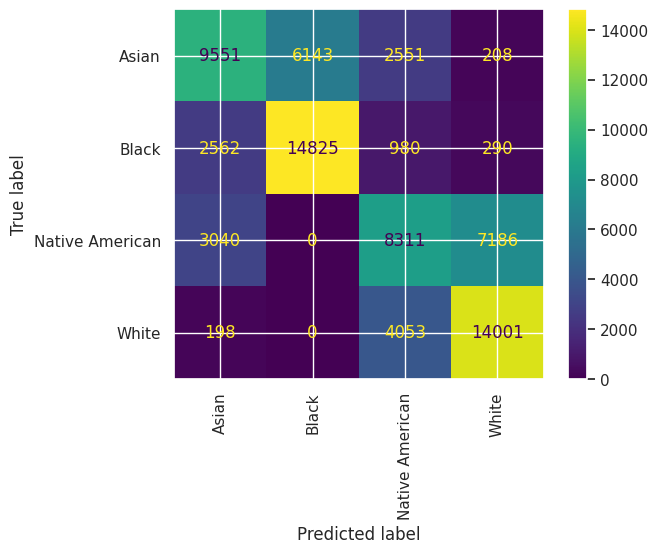

In [33]:
print("Accuracy: ", model.score(X_test, y_test), "\n")
confusion_mat(y_test, y_pred, np.unique(y_pred))

# 3. Experiment #2: Decision Tree (Feature Set, depth of 15) - Implementation and Results

Below we have created a Decision Tree model, fit it to the training data and labels, generated predictions for the test data split, and printed the accuracy as well as visualized a confusion matrix. The Decision Tree model performed much better than the LogReg model on the same input data with an accuracy of 99%.

Train Accuracy:  0.9940154603426986 

Test Accuracy:  0.994018863584081 



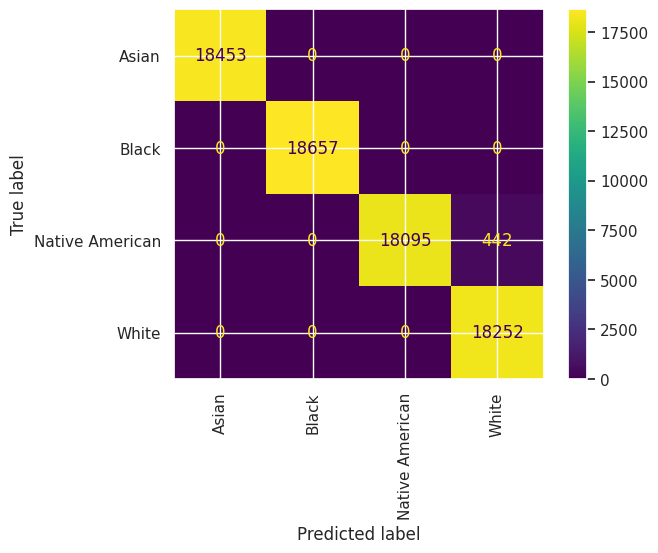

In [36]:
# Decision tree with entropy
decision_tree = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 15, min_samples_leaf = 5)
  
# Performing training
decision_tree.fit(X_train, y_train)

# generate predictions
y_pred = decision_tree.predict(X_test)

print("Train Accuracy: ", decision_tree.score(X_train, y_train), "\n")
print("Test Accuracy: ", metrics.accuracy_score(y_test, y_pred), "\n")




# print confusion matrix
confusion_mat(y_test, y_pred, np.unique(y_pred))



# 4. References

GeeksforGeeks. (2023, January 10). Python: Decision tree implementation. GeeksforGeeks. Retrieved from https://www.geeksforgeeks.org/decision-tree-implementation-python/ 

w3schools. (n.d.). Machine learning - confusion matrix. Python Machine Learning - Confusion Matrix. Retrieved 24AD, from https://www.w3schools.com/python/python_ml_confusion_matrix.asp